In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <p style='text-align: center; text-decoration: underline; color: purple'>Analytics</p>

In [26]:
df = pd.read_csv('df_fit.csv')
df.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,85705304,1128.0,125.0,petrol,1.199,5.5
1,52096030,1315.0,127.0,petrol,0.999,5.6
2,81371067,1334.0,133.0,petrol,0.999,5.9
3,56380957,2020.0,169.0,diesel,2.925,6.4
4,82639177,1190.0,133.0,petrol,1.490,5.9


In [27]:
print(df.shape)
df.describe()

(1000000, 6)


,ID,Mass_(kg),CO2_emission_(g/km),Engine_size,Fuel_consumption_(l/100km)
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,6.424653e+07,1520.241665,153.045243,1.634590,6.515288
std,2.094799e+07,300.056664,31.018039,0.607219,1.239309
min,8.000000e+00,658.000000,102.000000,0.875000,5.436000
25%,5.184526e+07,1295.000000,133.000000,1.199000,5.800000
50%,7.479176e+07,1441.000000,144.000000,1.498000,6.200000
75%,8.086995e+07,1680.000000,160.000000,1.984000,6.800000
max,1.496951e+08,3487.000000,572.000000,7.993000,25.200000


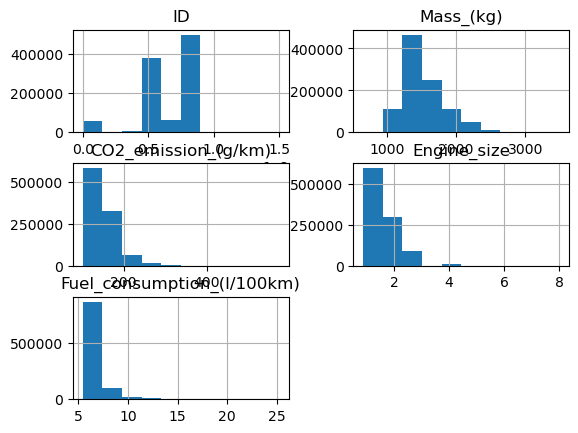

In [28]:
df.hist()
plt.show()

In [29]:
df1 = df[(df['Mass_(kg)'] >= 900) & (df['Mass_(kg)'] <= 3000)]
df1.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,85705304,1128.0,125.0,petrol,1.199,5.5
1,52096030,1315.0,127.0,petrol,0.999,5.6
2,81371067,1334.0,133.0,petrol,0.999,5.9
3,56380957,2020.0,169.0,diesel,2.925,6.4
4,82639177,1190.0,133.0,petrol,1.490,5.9


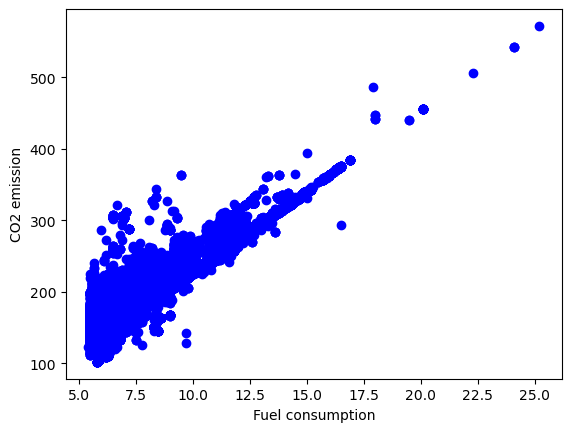

In [30]:
plt.scatter(df['Fuel_consumption_(l/100km)'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 emission')
plt.show()

In [37]:
df.sort_values('CO2_emission_(g/km)')

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
809365,496212,1300.0,102.0,petrol,1.498,5.8
824486,151913,1300.0,102.0,petrol,1.498,5.8
249591,655499,1300.0,102.0,petrol,1.498,5.8
544920,91416,1300.0,102.0,petrol,1.498,5.8
626140,743789,1300.0,102.0,petrol,1.498,5.8
...,...,...,...,...,...,...
237913,51966576,2070.0,506.0,petrol,7.993,22.3
133134,85107550,1435.0,543.0,petrol,6.499,24.1
366250,78547567,1435.0,543.0,petrol,6.499,24.1
658965,79948999,1435.0,543.0,petrol,6.499,24.1


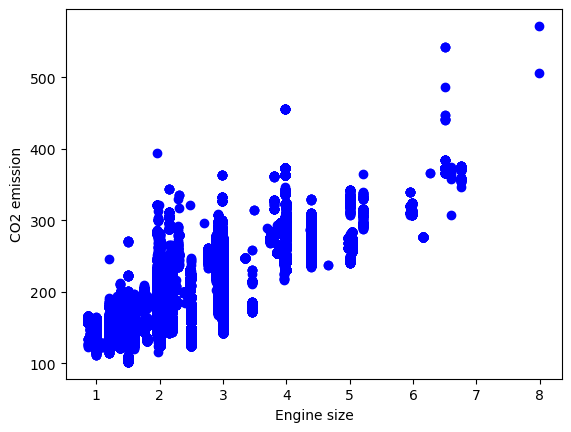

In [32]:
plt.scatter(df['Engine_size'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

---

## Modelo de regresion lineal

### Entrenamiento

In [33]:
msk = np.random.rand(len(df)) < 0.8 #msk = mask. Lista de len(df) numeros aleatorios entre el 0 y 1. aproximadamente el 80% del conjunto (<0.8)
train = df[msk]
test = df[~msk]

In [34]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_size']])
train_y = np.asanyarray(train[['CO2_emission_(g/km)']])
regr.fit(train_x, train_y)

#Coeficientes
print('Pendiente:', regr.coef_)
print('Interseccion', regr.intercept_)

Pendiente: [[38.72891066]]
Interseccion [89.72854954]


##### Graficamos el resultado

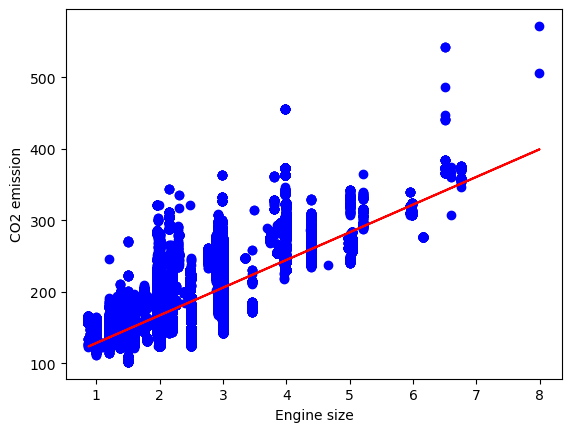

In [35]:
plt.scatter(train['Engine_size'], train['CO2_emission_(g/km)'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

### Testeo

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine_size']])
test_y = np.asanyarray(test[['CO2_emission_(g/km)']])
test_y_ = regr.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual de la suma de los cuadrados (MSE): %0.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %0.2f' % r2_score(test_y, test_y_))

Error medio absoluto: 13.85
Residual de la suma de los cuadrados (MSE): 406.69
R2-score: 0.58
